In [1]:
import copy
import os
import sys
import torch
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

sys.path.append("..")
pd.set_option("display.max_rows", None, "display.max_columns", None)

In [34]:
def plot_big_token_attack(
    file="../_dump/theory_attacks/theory_attack_big_token.csv",
    saveto = "dump/theory_attack_repeat_token.png",
    tfs = 14,
    lfs = 12,
):
    df = pd.read_csv(file)
    vals_n16 = np.array(df[df["num_vars"] == 16].sort_values(by=["kappa_power"]).states_acc)
    vals_n32 = np.array(df[df["num_vars"] == 32].sort_values(by=["kappa_power"]).states_acc)    
    vals_n48 = np.array(df[df["num_vars"] == 48].sort_values(by=["kappa_power"]).states_acc)
    vals_n64 = np.array(df[df["num_vars"] == 64].sort_values(by=["kappa_power"]).states_acc)
    
    # -1.000, -0.875, ..., 1.000
    kappa_pows = np.array([-1 + 0.125*k for k in range(17)])
    
    plt.clf()
    plt.plot(kappa_pows, vals_n16, label="n=16, d=32")
    plt.plot(kappa_pows, vals_n32, label="n=32, d=64")
    plt.plot(kappa_pows, vals_n48, label="n=48, d=96")
    plt.plot(kappa_pows, vals_n64, label="n=64, d=128")

    plt.title("Big Token Attack", fontsize=tfs)
    plt.legend(loc="lower right", fontsize=lfs)
    plt.ylabel("Attack Success Rate", fontsize=lfs)
    plt.xlabel("kappa (log10)", fontsize=lfs)
    
    plt.savefig(saveto, bbox_inches="tight")
    return plt

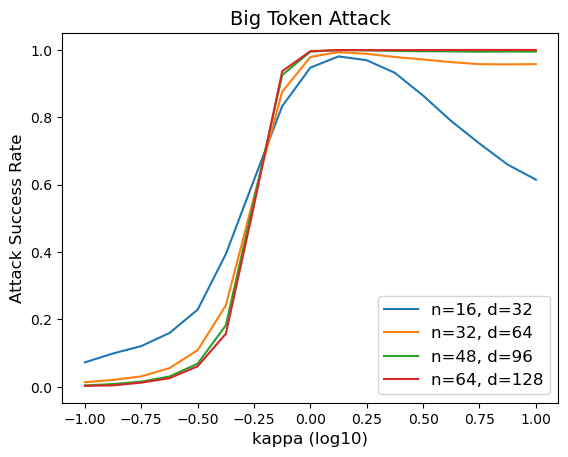

In [35]:
plt = plot_big_token_attack();

In [40]:
def plot_repeat_token_attack(
    file = "../_dump/theory_attacks/theory_attack_repeat_token.csv",
    saveto = "dump/theory_attack_repeat_token.png",
    tfs = 14,
    lfs = 12,
):
    df = pd.read_csv(file)
    vals_n16 = np.array(df[df["num_vars"] == 16].sort_values(by=["repeat_power"]).states_acc)
    vals_n32 = np.array(df[df["num_vars"] == 32].sort_values(by=["repeat_power"]).states_acc)
    vals_n48 = np.array(df[df["num_vars"] == 48].sort_values(by=["repeat_power"]).states_acc)
    vals_n64 = np.array(df[df["num_vars"] == 64].sort_values(by=["repeat_power"]).states_acc)

    repeat_pows = np.array(range(15))
    
    plt.clf()
    plt.plot(repeat_pows, vals_n16, label="n=16, d=32")
    plt.plot(repeat_pows, vals_n32, label="n=32, d=64")
    plt.plot(repeat_pows, vals_n48, label="n=48, d=96")
    plt.plot(repeat_pows, vals_n64, label="n=64, d=128")

    plt.title("Repeat Token Attack", fontsize=tfs)
    plt.legend(loc="upper left", fontsize=lfs)
    plt.ylabel("Attack Success Rate", fontsize=lfs)
    plt.xlabel("Num Repeats (log2)", fontsize=lfs)
    
    plt.savefig(saveto, bbox_inches="tight")
    return plt

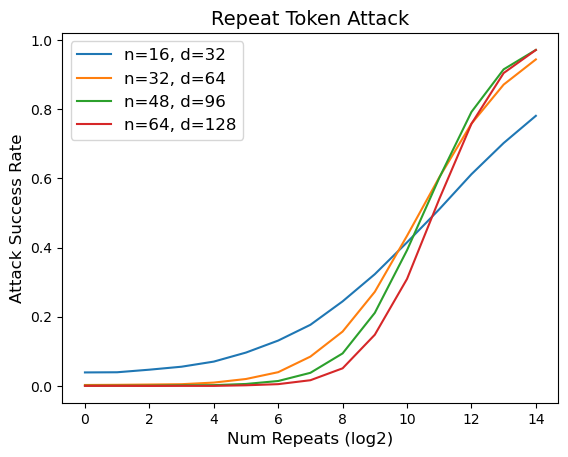

In [42]:
plt = plot_repeat_token_attack();